In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import rc_context
sc.settings.verbosity = 1

#sc.logging.print_versions()

import os 
import sys
import gc
import importlib

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.sans-serif'] = 'Arial'
sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=True)
sns.set_style('white', {'axes.grid' : False})

sys.path.append('/home/lee/project/scanpy_func/')

import scanpy_func as sf

def vector(on=False):
    if on:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=False)
    else:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=True)
vector(False)

# RNA

In [2]:
# rna = sc.read_h5ad('/storage/zhufan/01.herv/gse196830/GSE196830_re_anno.h5ad')
rna = sc.read_h5ad('rna.h5ad')

In [3]:
genes=['leiden','celltype_anno_2']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for i, gene in enumerate(genes):
    col = i % 3
    sc.pl.umap(adata, color=gene, legend_loc='on data', add_outline=True, palette='Set3',
               legend_fontsize=10, legend_fontoutline=5, cmap='Reds', vmax=4, vmin=0,
               frameon=True, title=gene, size=15, ax=axs[col], show=False)  

plt.tight_layout()  
# fig.savefig('./umap-marker.pdf')  

AnnData object with n_obs × n_vars = 1204245 × 23050
    obs: 'batch', 'pool', 'cell_ID', 'indiv_ID', 'disease', 'genetic_ancestry', 'sex', 'orig_celltype', 'age', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rp', 'pct_counts_rp', 'n_genes', 'leiden', 'celltype', 'subtype', 'age_stage', 'age_phase'
    var: 'highly_variable'
    uns: 'celltype_colors', 'subtype_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'

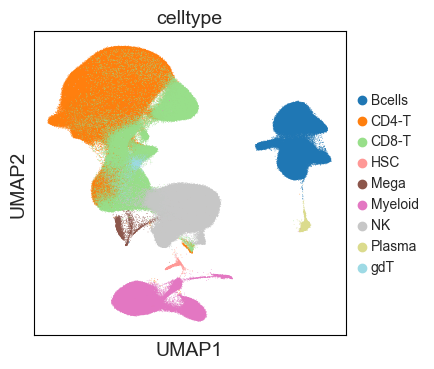

In [38]:
sc.pl.umap(rna, color='celltype', legend_fontsize=10, legend_fontoutline=5, size=1, palette='tab20')

In [6]:
# colors = ['#D2D2D2', '#F5AB5E', '#947959', '#5F97C6', '#F09496', '#9C9BE9', '#AFC778', '#EFDBB9', '#A3CDEA', '#F4DFDD']
# colors = ['#D2D2D2', '#F4DFDD', '#947959', '#5F97C6', '#F09496', '#9C9BE9', '#AFC778', '#EFDBB9', '#A3CDEA', ]
# colors = ["#DEECF6", 
# "#AFC8E2", 
# "#E2F2CD", 
# "#B6DAA7", 
# "#F9D5D5", 
# "#EF98A1", 
# "#FBE3C0", 
# "#FBC99A", 
# "#E8E0EF", 
# "#C2B1D7",]
colors = ["#A5D1B0", 
"#CE8A8D", 
"#FFF7C1", 
"#E0F3FF", 
"#ADD3F4", 
"#F7C9CF", 
"#FCCB8E", 
"#7CA3B8", 
"#BFB8D6", 
"#FCCB8E"]

# sc.pl.umap(rna, color='celltype', legend_fontsize=10, legend_fontoutline=5, size=1, palette=colors, save='rna_cluster.pdf')

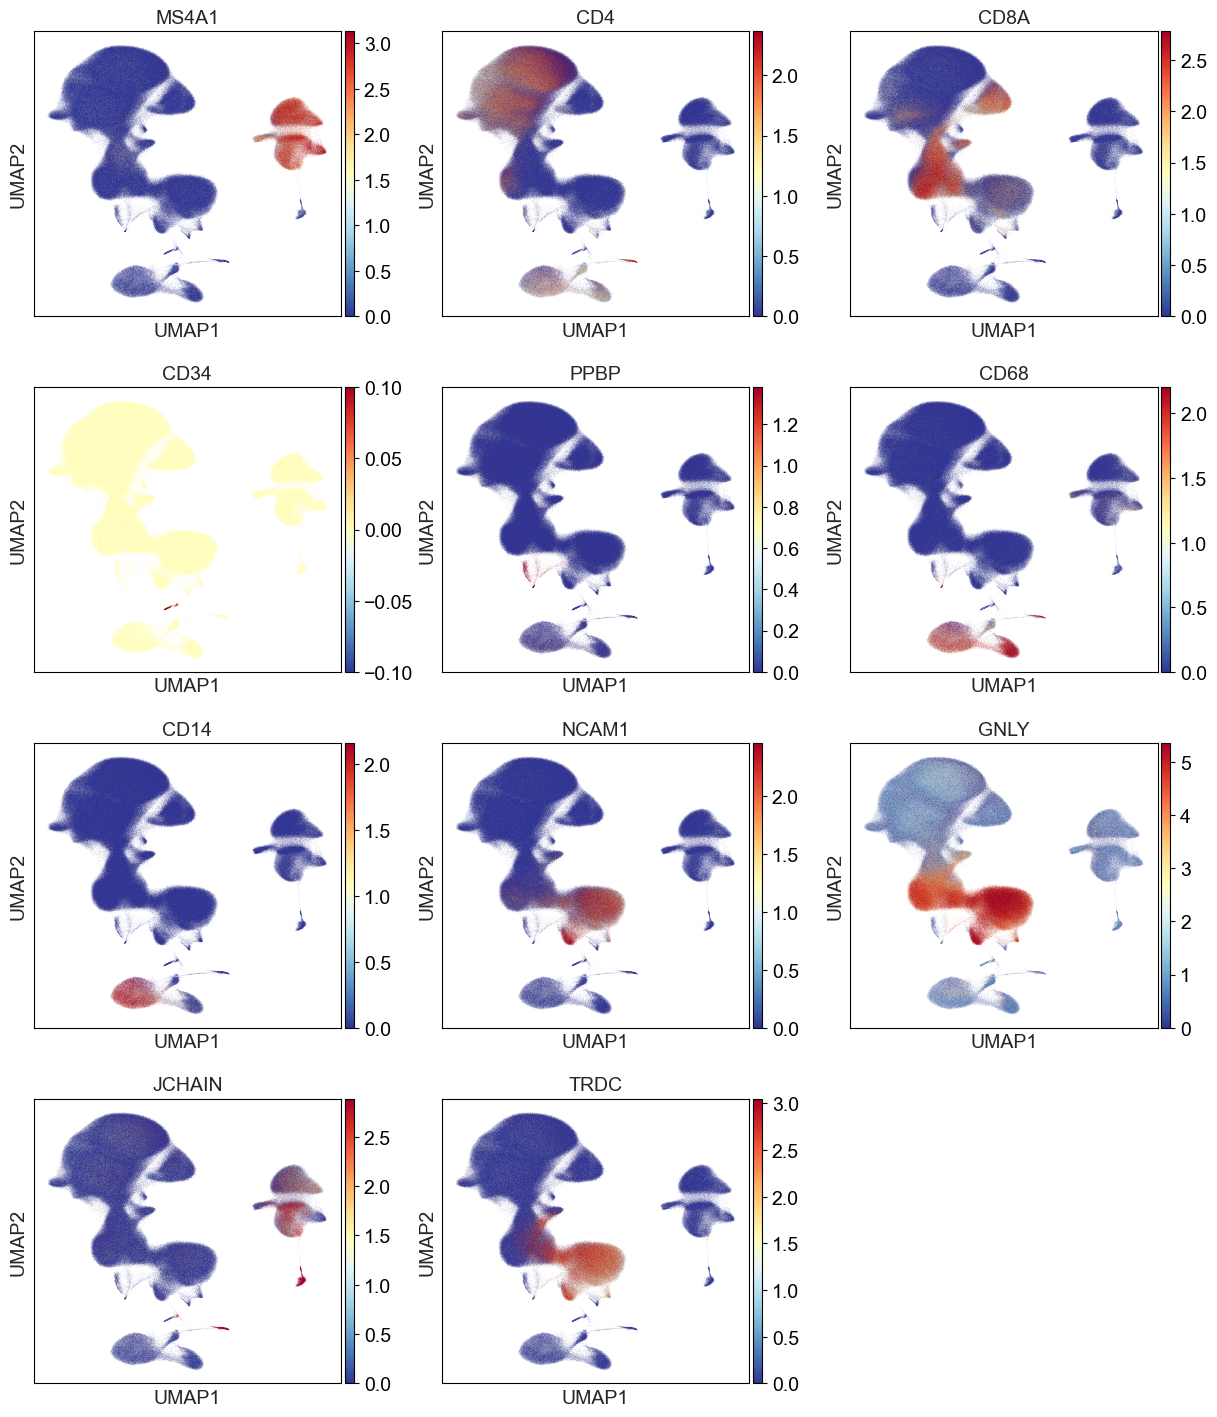

In [55]:
sc.pl.umap(rna, color=['MS4A1', 'CD4', 'CD8A', 'CD34','PPBP','CD68','CD14', 'NCAM1', 'GNLY', 'JCHAIN', 'TRDC'],
           cmap='RdYlBu_r', ncols=3, vmax='p99', save='rna_markers.pdf')

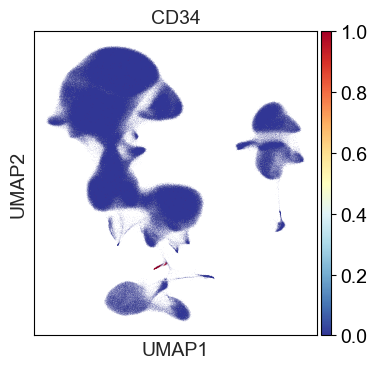

In [51]:
sc.pl.umap(rna, color=['CD34'],
           cmap='RdYlBu_r', ncols=3, vmax=1, save='rna_cd34.pdf')

# HERV

In [3]:
adata = sc.read_h5ad('/storage/zhufan/01.herv/gse196830/herv.norm.anno.h5ad')

In [176]:
meta = pd.read_csv('/storage/zhufan/01.herv/annotation/herv.info.bed', sep='\t',header=None)
meta.columns = ['chr', 'start', 'end', 'id', 'strand', 'family']
meta['length'] = meta['end'] - meta['start']
meta['length']

0         1224
1          271
2          363
3           86
4          957
          ... 
692754      52
692755     639
692756     555
692757     216
692758     559
Name: length, Length: 692759, dtype: int64

In [177]:
meta

,chr,start,end,id,strand,family,length
0,chr1,159383131,159384355,MSTA-int-chr1,+,ERVL-MaLR,1224
1,chr1,226492180,226492451,HUERS-P3b-int-chr1,-,ERV1,271
2,chr1,6291168,6291531,MLT1C-chr1,+,ERVL-MaLR,363
3,chr1,26214343,26214429,MLT1K-chr1,-,ERVL-MaLR,86
4,chr1,29359333,29360290,LTR5_Hs-chr1,+,ERVK,957
...,...,...,...,...,...,...,...
692754,chr22,50802798,50802850,MER72_dup6-chr22,-,ERV1,52
692755,chr22,50803158,50803797,MER72_dup7-chr22,-,ERV1,639
692756,chr22,50804200,50804755,MER34C__dup6-chr22,-,ERV1,555
692757,chr22,50805391,50805607,LTR60B_dup2-chr22,+,ERV1,216


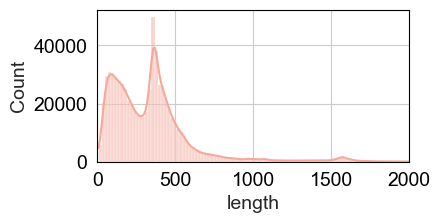

In [185]:
data = meta['length']
data = data[data<=2000]

fig, ax = plt.subplots(figsize=(4,2))
sns.histplot(data, ax=ax, kde=True, bins=100, color='#F4A99B', alpha=0.5)
ax.set_xlim(0,2000)
# plt.xscale("log")
plt.savefig('total_dist.pdf')

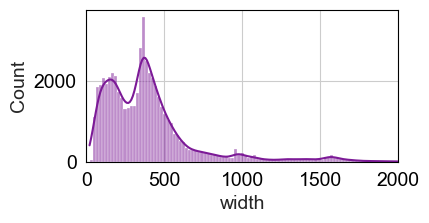

In [186]:
data = adata.var['width']
data = data[data<=2000]

fig, ax = plt.subplots(figsize=(4,2))
sns.histplot(data, ax=ax, kde=True, bins=100, color='#7C1A97', alpha=0.5)
ax.set_xlim(0,2000)
# plt.yscale("log")
plt.savefig('exp_dist.pdf')

In [192]:
df_ratio = pd.DataFrame([ratio2, ratio1], index=['total', 'expr']).T
df_ratio

,total,expr
ERVL-MaLR,333723,26306
ERV1,165173,17271
ERVL,154565,9850
ERVK,9866,1640
Gypsy,16073,751
Other,13359,850


In [194]:
df_ratio = df_ratio / df_ratio.sum()
df_ratio

,total,expr
ERVL-MaLR,0.481730,0.464213
ERV1,0.238428,0.304775
ERVL,0.223115,0.173819
ERVK,0.014242,0.028940
Gypsy,0.023201,0.013253
Other,0.019284,0.015000


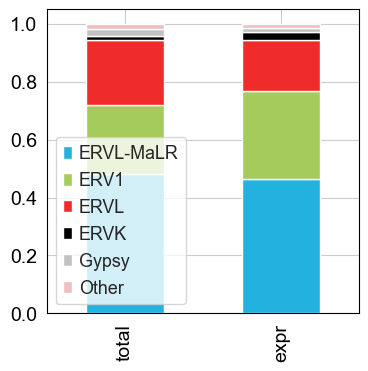

In [219]:
color6 = [ "#EEBEC0",	"#C2C2C2",	"#000000", 	"#EF2C2B",  	"#A5CC5B", "#23B2E0", ]
df_ratio.T.plot(kind='bar', stacked=True, 
                color=color6[::-1])
plt.savefig('figures/family_ratio.pdf')

In [235]:
adata.obsm = rna.obsm.copy()

In [9]:
sf.sc_qc(adata, sc_filter=False)
adata.obs['herv_per_1e4umi'] = adata.obs['total_counts']/adata.obs['UMI_counts'] * 1e4

/tmp/ipykernel_781225/949377555.py:4: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.scatterplot(data=adata.obs.loc[cells, :], x='UMI_counts', y='herv_per_1e4umi', hue='celltype', s=5, linewidth=0.01, palette=colors, rasterized=True)


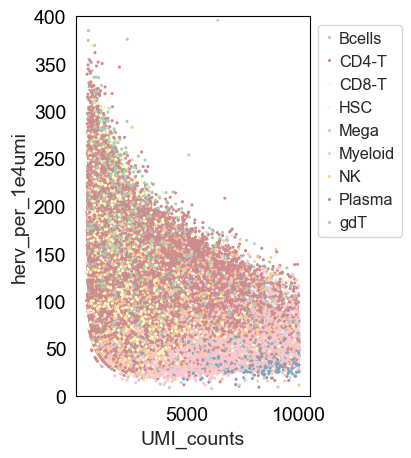

In [16]:
cells = adata[adata.obs['UMI_counts']<=10000].obs_names.tolist()
random.shuffle(cells)
fig, ax = plt.subplots(figsize=(3,5))
sns.scatterplot(data=adata.obs.loc[cells, :], x='UMI_counts', y='herv_per_1e4umi', hue='celltype', s=5, linewidth=0.01, palette=colors, rasterized=True)
ax.set_ylim(0,400)
ax.grid(False)
plt.legend(
    bbox_to_anchor=(1.0, 1.0),
    fontsize='small',
)
plt.savefig('norm_herv.pdf')
# sf.regplot(df=adata.obs.loc[cells, :], x='UMI_counts', y='herv_per_1e4umi', hue='celltype', size=0.1, palette=colors,
#            rasterized=True, ax=ax)

/tmp/ipykernel_781225/3597347334.py:5: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.scatterplot(data=adata.obs.loc[cells, :], x='UMI_counts', y='herv_per_1e4umi', hue='celltype', s=5, linewidth=0.01, palette=colors, rasterized=True)


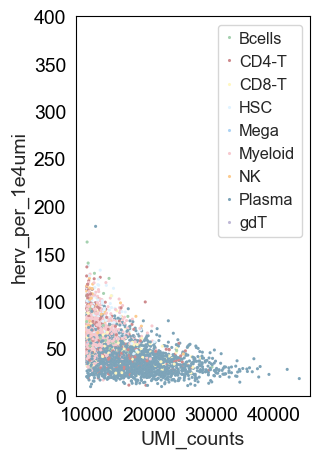

In [15]:
import random
cells = adata[adata.obs['UMI_counts']>10000].obs_names.tolist()
random.shuffle(cells)
fig, ax = plt.subplots(figsize=(3,5))
sns.scatterplot(data=adata.obs.loc[cells, :], x='UMI_counts', y='herv_per_1e4umi', hue='celltype', s=5, linewidth=0.01, palette=colors, rasterized=True)
ax.set_ylim(0,400)
ax.grid(False)
plt.legend(
    bbox_to_anchor=(1.0, 1.0),
    fontsize='small',
)
plt.savefig('norm_herv2.pdf')

/home/lee/miniconda3/envs/rapids/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:907: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/lee/miniconda3/envs/rapids/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:907: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  ax = sns.violinplot(


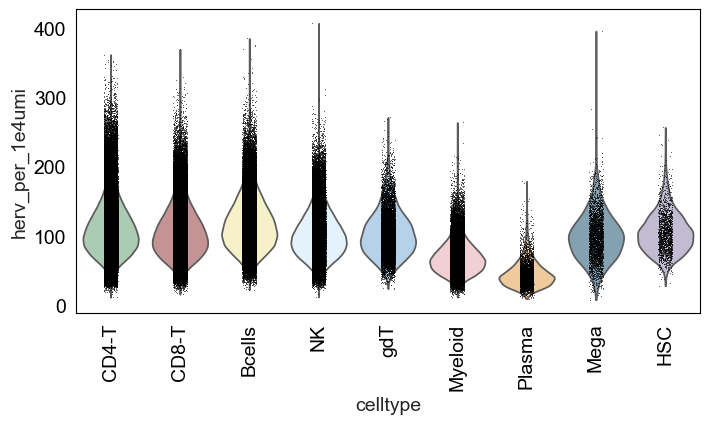

In [260]:
# sc.pl.violin(adata, keys='herv_per_1e4umi', groupby='celltype', palette=colors)
order = ['CD4-T', 'CD8-T','Bcells', 'NK', 'gdT', 'Myeloid',  'Plasma', 'Mega', 'HSC' ]
with rc_context(rc={'figure.figsize': (8,4)}):
    fig, ax = plt.subplots()
    sc.pl.violin(adata, keys=['herv_per_1e4umi', ], groupby='celltype', 
                 rotation=90, palette=colors, order=order,  show=False, size=0.2, ax=ax, stripplot=False)
    sns.stripplot(data=adata.obs, x='celltype', y='herv_per_1e4umi', rasterized=True, size=0.5, ax=ax, color='black')

    ax.grid(False)
plt.savefig('test.pdf')
plt.show()

In [62]:
sf.sc_qc(adata, sc_filter=False)

AnnData object with n_obs × n_vars = 1174452 × 56668
    obs: 'batch', 'pool', 'n_genes', 'indiv_ID', 'sex', 'age', 'celltype', 'age_stage', 'age_phase', 'total_herv', 'UMI_counts', 'HERV_Norm', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rp', 'pct_counts_rp'
    var: 'n_cells', 'chrom', 'start', 'end', 'width', 'annotation', 'distanceToTSS', 'gene_name', 'mt', 'rp', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'umi_norm'

/home/lee/miniconda3/envs/rapids/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:907: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/lee/miniconda3/envs/rapids/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:907: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  ax = sns.violinplot(


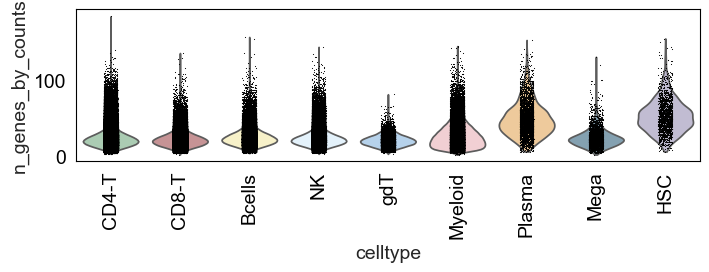

In [44]:
order = ['CD4-T', 'CD8-T','Bcells', 'NK', 'gdT', 'Myeloid',  'Plasma', 'Mega', 'HSC' ]
with rc_context(rc={'figure.figsize': (8,2)}):
    y = 'n_genes_by_counts'
    fig, ax = plt.subplots()
    sc.pl.violin(adata, keys=[y], groupby='celltype', stripplot=False, show=False,
                 rotation=90, palette=colors, order=order, ax=ax)
    sns.stripplot(data=adata.obs, x='celltype', y=y, rasterized=True, size=0.8, ax=ax, color='black')

    ax.grid(False)
plt.savefig('herv_qc.pdf')
plt.show()

/home/lee/miniconda3/envs/rapids/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:907: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/lee/miniconda3/envs/rapids/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:907: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  ax = sns.violinplot(


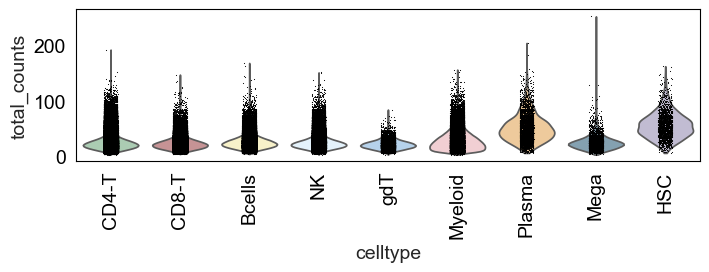

In [41]:
order = ['CD4-T', 'CD8-T','Bcells', 'NK', 'gdT', 'Myeloid',  'Plasma', 'Mega', 'HSC' ]
with rc_context(rc={'figure.figsize': (8,2)}):
    y = 'total_counts'
    fig, ax = plt.subplots()
    sc.pl.violin(adata, keys=[y], groupby='celltype', stripplot=False, show=False,
                 rotation=90, palette=colors, order=order, ax=ax)
    sns.stripplot(data=adata.obs, x='celltype', y=y, rasterized=True, size=0.8, ax=ax, color='black')

    ax.grid(False)
plt.savefig('herv_qc2.pdf')
plt.show()

/home/lee/miniconda3/envs/rapids/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:907: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/lee/miniconda3/envs/rapids/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:907: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  ax = sns.violinplot(


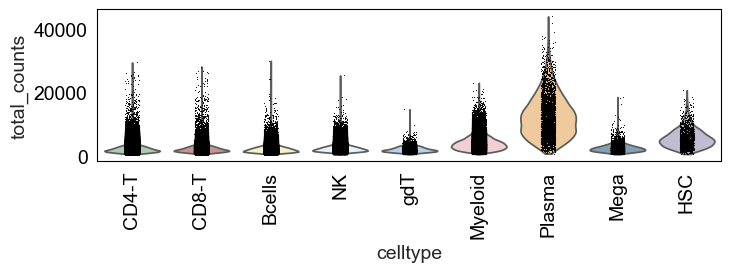

In [42]:
order = ['CD4-T', 'CD8-T','Bcells', 'NK', 'gdT', 'Myeloid',  'Plasma', 'Mega', 'HSC' ]
with rc_context(rc={'figure.figsize': (8,2)}):
    y = 'total_counts'
    fig, ax = plt.subplots()
    sc.pl.violin(rna, keys=[y], groupby='celltype', stripplot=False, show=False,
                 rotation=90, palette=colors, order=order, ax=ax)
    sns.stripplot(data=rna.obs, x='celltype', y=y, rasterized=True, size=0.8, ax=ax, color='black')

    ax.grid(False)
plt.savefig('rna_qc2.pdf')
plt.show()

/home/lee/miniconda3/envs/rapids/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:907: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/lee/miniconda3/envs/rapids/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:907: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  ax = sns.violinplot(


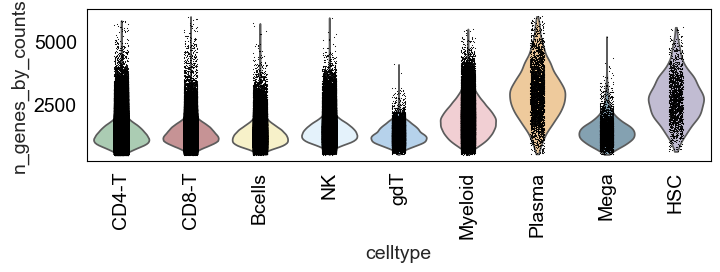

In [43]:
order = ['CD4-T', 'CD8-T','Bcells', 'NK', 'gdT', 'Myeloid',  'Plasma', 'Mega', 'HSC' ]
with rc_context(rc={'figure.figsize': (8,2)}):
    y = 'n_genes_by_counts'
    fig, ax = plt.subplots()
    sc.pl.violin(rna, keys=[y], groupby='celltype', stripplot=False, show=False,
                 rotation=90, palette=colors, order=order, ax=ax)
    sns.stripplot(data=rna.obs, x='celltype', y=y, rasterized=True, size=0.8, ax=ax, color='black')

    ax.grid(False)
plt.savefig('rna_qc.pdf')
plt.show()

/home/lee/project/scanpy_func/scanpy_func.py:905: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  import scipy as sp


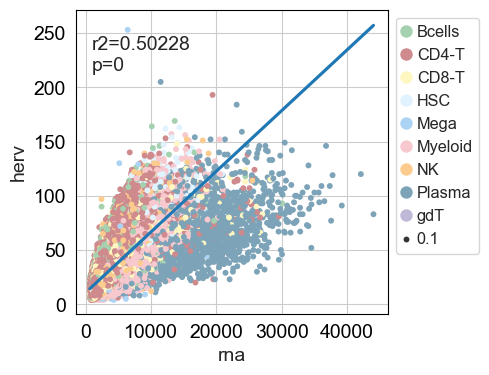

In [ ]:
cells = df.index.tolist()
random.shuffle(cells)
# sns.scatterplot(data=df.loc[cells, :], x='rna', y='herv', hue='celltype', s=5, linewidth=0.01)
sf.regplot(df=df.loc[cells, :], x='rna', y='herv', hue='celltype', size=0.1, palette=colors,
           rasterized=True, save='rna_herv_cor.pdf')

In [53]:
meta = pd.read_csv('/storage/zhufan/01.herv/annotation/herv.anno.csv')
meta.index = meta['herv_name'].values
meta

,herv_name,herv_name.1,anno
LTR78_dup1-chr1,LTR78_dup1-chr1,LTR78_dup1-chr1,Promoter
MER4B-int_dup5-chr1,MER4B-int_dup5-chr1,MER4B-int_dup5-chr1,Promoter
MER54A_dup2-chr1,MER54A_dup2-chr1,MER54A_dup2-chr1,Promoter
MER41B_dup2-chr1,MER41B_dup2-chr1,MER41B_dup2-chr1,Downstream (<=300bp)
LTR10A_dup1-chr1,LTR10A_dup1-chr1,LTR10A_dup1-chr1,Promoter
...,...,...,...
LTR49-int_dup46-chr22,LTR49-int_dup46-chr22,LTR49-int_dup46-chr22,Distal Intergenic
LTR49-int_dup47-chr22,LTR49-int_dup47-chr22,LTR49-int_dup47-chr22,Distal Intergenic
LTR49_dup13-chr22,LTR49_dup13-chr22,LTR49_dup13-chr22,Distal Intergenic
LTR16A1_dup19-chr22,LTR16A1_dup19-chr22,LTR16A1_dup19-chr22,Distal Intergenic


In [61]:
# adata.var['anno2'] = meta.loc[adata.var_names, 'anno']
# adata.var['anno2'] = [x.replace('lian', 'strand') for x in adata.var['anno2']]
# adata.var['anno'] = adata.var['anno2'].copy()
adata.var = adata.var.drop('anno2', axis=1)
adata.var

,n_cells,chrom,start,end,width,annotation,distanceToTSS,gene_name,site_name,name,rep_name,mt,rp,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,anno
LTR49-chr1,43,chr1,206569076,206569629,553,"Intron (ENST00000579436/ENSG00000266094, intro...",11516,RASSF5,LTR49-chr1,ERV1,LTR49,False,False,43,0.000037,99.996339,43.0,intron_opposite_strand
LTR7-chr1,21,chr1,12713729,12714137,408,Distal Intergenic,-1973,AADACL3,LTR7-chr1,ERV1,LTR7,False,False,21,0.000018,99.998212,21.0,Distal Intergenic
MER67B-chr1,76,chr1,32636724,32637249,525,"Intron (ENST00000341885/ENSG00000176261, intro...",-2203,ZBTB8OS,MER67B-chr1,ERV1,MER67B,False,False,76,0.000065,99.993529,76.0,intron_opposite_strand
MLT2D-chr1,2699,chr1,39059424,39059593,169,Distal Intergenic,-21723,MACF1,MLT2D-chr1,ERVL,MLT2D,False,False,2699,0.002307,99.770191,2709.0,Distal Intergenic
MLT1K_dup1-chr1,3563,chr1,92929843,92930066,223,"Intron (ENST00000615519/ENSG00000154511, intro...",31396,DIPK1A,MLT1K_dup1-chr1,ERVL-MaLR,MLT1K,False,False,3563,0.003043,99.696624,3574.0,intron_sample_strand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LTR49-int_dup47-chr22,61,chr22,50636309,50636899,590,Distal Intergenic,-8137,ARSA,LTR49-int_dup47-chr22,ERV1,LTR49-int,False,False,61,0.000053,99.994806,62.0,Distal Intergenic
LTR49_dup13-chr22,1289,chr22,50639810,50640345,535,Distal Intergenic,-11638,ARSA,LTR49_dup13-chr22,ERV1,LTR49,False,False,1289,0.001105,99.890247,1298.0,Distal Intergenic
LTR16A1_dup19-chr22,39,chr22,50766811,50767060,249,Distal Intergenic,3442,RABL2B,LTR16A1_dup19-chr22,ERVL,LTR16A1,False,False,39,0.000033,99.996679,39.0,Distal Intergenic
LTR79_dup40-chr22,339,chr22,50780836,50780987,151,"Intron (ENST00000435118/ENSG00000079974, intro...",1327,RABL2B,LTR79_dup40-chr22,ERVL,LTR79,False,False,339,0.000289,99.971135,340.0,intron_opposite_strand


In [62]:
adata.write('herv.h5ad')

In [69]:
# adata = adata[:, adata.var['anno'] != 'Exon']
df = adata.var['anno'].value_counts()
df

Distal Intergenic         24547
intron_opposite_strand    16174
intron_sample_strand      13175
Promoter                   2622
Downstream (<=300bp)        126
3' UTR                       22
5' UTR                        1
Name: anno, dtype: int64

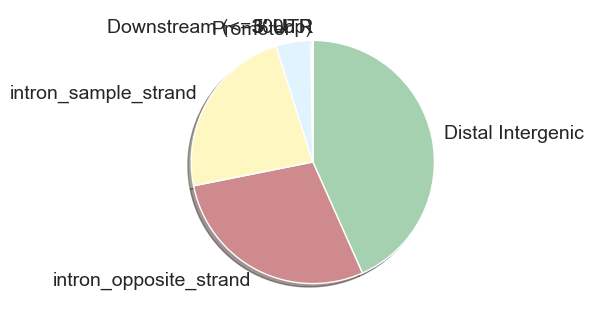

In [72]:
# color6 = ["#C72228", 	"#F98F34", 	"#0C4E9B", 	"#F5867F", 	"#FFBC80", 	"#6B98C4"]
plt.pie(df, labels=df.index, startangle=90, shadow=True, counterclock=False, colors=sf.color10 )
plt.savefig('herv_pie.pdf')

# individual

In [31]:
adata_indiv = sf.adata_group(adata, groupby='indiv_ID')

/home/lee/miniconda3/envs/rapids/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [33]:
adata_indiv.write('herv_indiv.h5ad')

In [42]:
rna_indiv = sf.adata_group(rna, groupby='indiv_ID', layer='counts')

/home/lee/miniconda3/envs/rapids/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [51]:
# meta = rna.obs[['batch', 'pool','indiv_ID', 'disease', 'genetic_ancestry','sex', 'age', 'age_stage', 'age_phase']].drop_duplicates()
meta.index = meta['indiv_ID'].values
rna_indiv.obs = meta.loc[rna_indiv.obs_names, :]
rna_indiv.obs

/home/lee/miniconda3/envs/rapids/lib/python3.10/site-packages/anndata/_core/anndata.py:767: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    ['693_694', '689_690', '692_693', '687_688', '683_684']

    Inferred to be: categorical

  value_idx = self._prep_dim_index(value.index, attr)


,batch,pool,indiv_ID,disease,genetic_ancestry,sex,age,age_stage,age_phase
693_694,GSM5899873,1,693_694,normal,European,female,88,80,aged
689_690,GSM5899873,1,689_690,normal,European,male,59,50,aging
692_693,GSM5899873,1,692_693,normal,European,female,62,60,aging
687_688,GSM5899873,1,687_688,normal,European,female,63,60,aging
683_684,GSM5899873,1,683_684,normal,European,male,78,70,aged
...,...,...,...,...,...,...,...,...,...
197_198,GSM5899947,77,197_198,normal,European,male,60,60,aging
204_205,GSM5899947,77,204_205,normal,European,male,60,60,aging
199_200,GSM5899947,77,199_200,normal,European,female,63,60,aging
193_194,GSM5899947,77,193_194,normal,European,female,63,60,aging


In [52]:
rna_indiv.write('rna_indiv.h5ad')

In [61]:
# adata_indiv.obs = meta.loc[adata_indiv.obs_names, :]
# adata_indiv.var = adata.var.loc[:, ['chrom', 'start', 'end', 'width', 'annotation', 'distanceToTSS', 'gene_name', 'site_name', 'name', 'rep_name','anno']]
adata_indiv.write('herv_indiv.h5ad')

In [63]:
adata_indiv = sf.sc_qc(adata_indiv, sc_filter=False)

In [15]:
tmp = adata_indiv.X.copy()
tmp = (tmp.T * 1e6 / rna_indiv.X.sum(axis=1)).T
tmp = np.log1p(tmp)

In [16]:
adata_indiv.layers['counts'] = adata_indiv.X.copy()
adata_indiv.X = tmp

In [17]:
rna_indiv.layers['counts'] = rna_indiv.X.copy()

In [18]:
tmp = rna_indiv.X.copy()
tmp = (tmp.T * 1e6 / rna_indiv.X.sum(axis=1)).T
tmp = np.log1p(tmp)

In [19]:
rna_indiv.X = tmp

In [22]:
adata_indiv.write('herv_indiv.h5ad')
rna_indiv.write('rna_indiv.h5ad')

In [3]:
adata_indiv = sc.read_h5ad('herv_indiv.h5ad')
rna_indiv = sc.read_h5ad('rna_indiv.h5ad')

/home/lee/miniconda3/envs/rapids/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/lee/miniconda3/envs/rapids/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [23]:
import scipy as sp
r_list = list()
p_list = list()

for herv_id in adata_indiv.var_names:
    try:
        r, p = sp.stats.pearsonr(adata_indiv[:, herv_id].X[:, 0], rna_indiv[:, adata_indiv.var.loc[herv_id, 'gene_name']].X[:, 0])
        r_list.append(r)
        p_list.append(p)
    except:
        r_list.append(np.nan)
        p_list.append(np.nan)       
    

In [24]:
df = adata_indiv.var.copy()
df['r'] = r_list
df['r2'] = [x**2 for x in r_list]
df['p'] = p_list
df['mean'] = adata_indiv.X.mean(axis=0)

df.dropna(inplace=True)
df['logP'] = -np.log10(df['p'])

/home/lee/miniconda3/envs/rapids/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [25]:
df.to_csv('herv_rna_corr.csv')

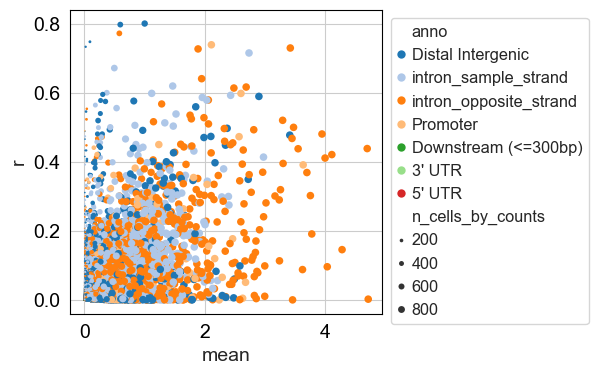

In [211]:
h = df.index.tolist()
random.shuffle(h)
df = df.loc[h, :]

sns.scatterplot(data=df, x='mean', y='r2', hue='anno', size='n_cells_by_counts', sizes=(1, 30), linewidth=0, palette='tab20',
               hue_order = ['Distal Intergenic', 'intron_sample_strand', 'intron_opposite_strand', 'Promoter', 'Downstream (<=300bp)', '3\' UTR', '5\' UTR'])

# sns.scatterplot(data=df.loc[df['anno']=='intron_opposite_strand'], x='mean', y='r')

# sns.scatterplot(data=df.loc[df['anno']=='intron_sample_strand'], x='mean', y='r')
plt.legend(
    bbox_to_anchor=(1.0, 1.0),
    fontsize='small',
)
plt.savefig('herv_corr.pdf')

In [246]:
order = ['Distal Intergenic', 'intron_sample_strand', 'intron_opposite_strand', 'Promoter', 'Downstream (<=300bp)', '3\' UTR', '5\' UTR']

/home/lee/miniconda3/envs/rapids/lib/python3.10/site-packages/seaborn/axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/home/lee/miniconda3/envs/rapids/lib/python3.10/site-packages/seaborn/axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


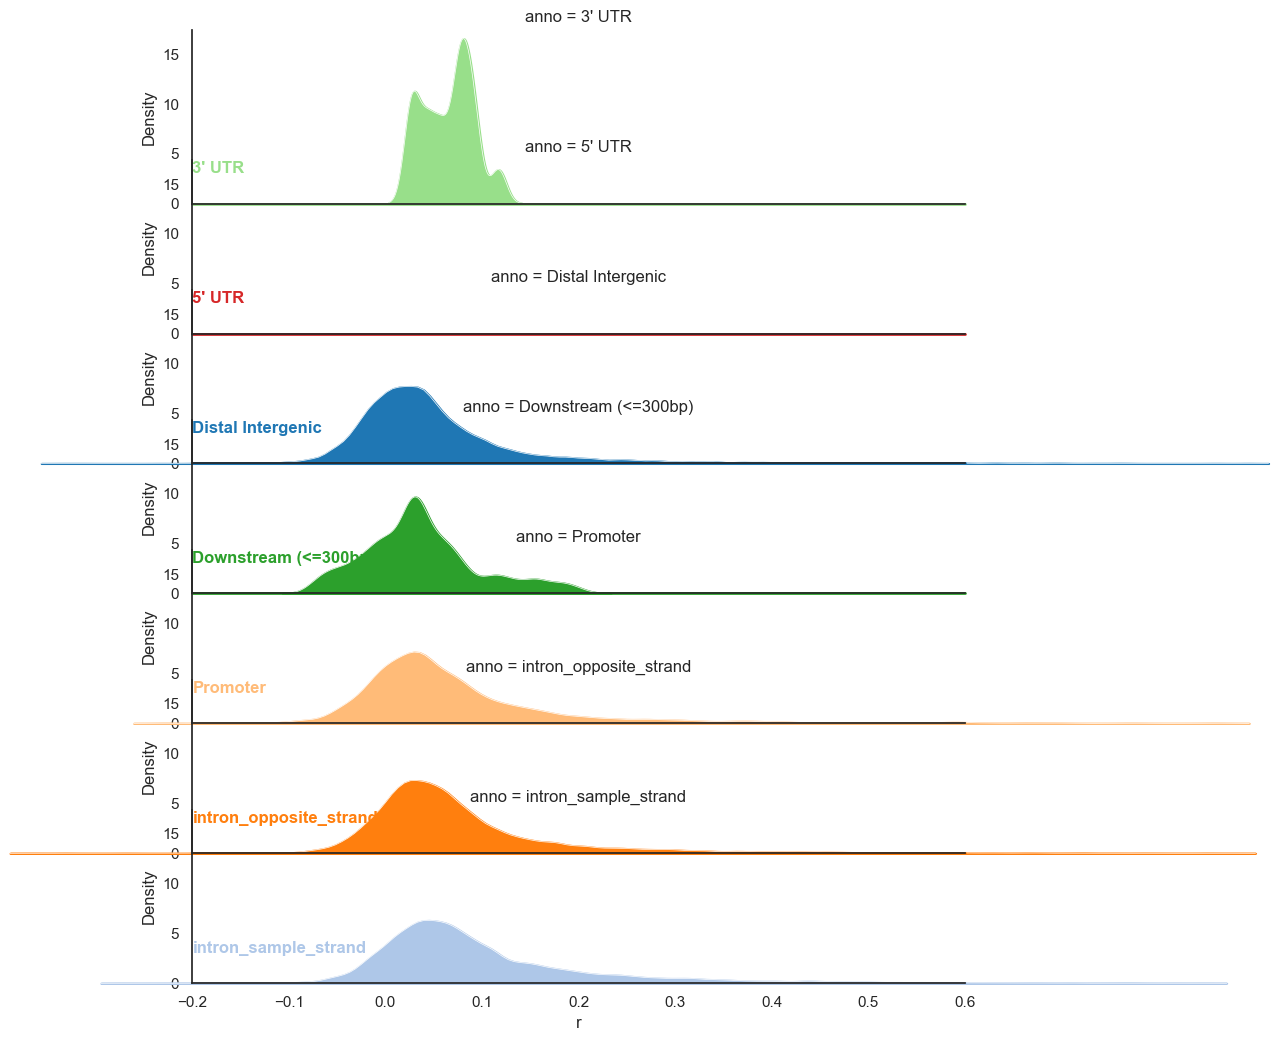

In [250]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
g = sns.FacetGrid(df, row="anno", hue="anno", aspect=10, height=1.5, palette='tab20', hue_order=order, xlim=(-0.2, 0.6))

# Draw the densities in a few steps
g.map(sns.kdeplot, "r",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "r", clip_on=False, color="w", lw=0.5, bw_adjust=.5)


# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "r")


g.figure.subplots_adjust(hspace=-.25)

g.savefig('herv_corr_ridge.pdf')

In [263]:
# rna.obs['indiv_celltype'] = rna.obs['indiv_ID'].astype('str') + '@' + rna.obs['celltype'].astype(str)
rna_indiv_cell = sf.adata_group(rna, groupby='indiv_celltype', layer='counts')

In [265]:
tmp = rna_indiv_cell.X.copy()
tmp = (tmp.T * 1e6 / rna_indiv_cell.X.sum(axis=1)).T
tmp = np.log1p(tmp)

In [266]:
rna_indiv_cell.layers['counts'] = rna_indiv_cell.X.copy()

In [267]:
rna_indiv_cell.X = tmp

In [269]:
rna_indiv_cell.obs['celltype'] = [x.split('@')[1] for x in rna_indiv_cell.obs_names]

In [271]:
rna_indiv_cell.write('rna_indiv_celltype.h5ad')

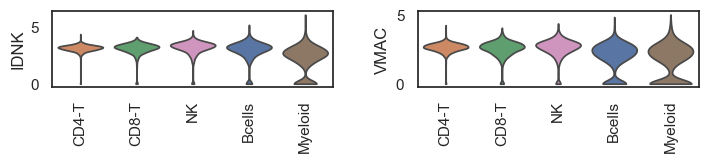

In [280]:
# sub = rna_indiv_cell[rna_indiv_cell.obs['celltype'].isin(test.obs['celltype'].unique())]
with rc_context(rc={'figure.figsize': (4,1)}):
    sc.pl.violin(sub, keys=['IDNK', 'VMAC'], groupby='celltype', rotation=90, stripplot=False, 
                 order=['CD4-T','CD8-T', 'NK', 'Bcells', 'Myeloid'], save='rna_markers.pdf')

In [282]:
adata.obs['indiv_celltype'] = adata.obs['indiv_ID'].astype('str') + '@' + adata.obs['celltype'].astype(str)
adata_indiv_cell = sf.adata_group(adata, groupby='indiv_celltype')

In [284]:
adata_indiv_cell.write('herv_indiv_celltyp.h5ad')